In [1]:
#All necessary imports
import numpy as np
import random
from termcolor import colored, cprint
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
def CP_Diff_Class(X,Y,xt):
    if len(X) != len(Y): #check if Samples and labels have same length
        return "Error:Size of Samples and Labels mismatched"
    
    labels = list(set(Y)) #Finding out the distinct Labels to assign
    
    predicted_labels = [] #will store the predicted label
    pvalue_pred_label = []  #stores higher pvalue scores
    pvalue_non_pred_label = [] #stores lower pvalue scores
    
    for b in range(len(xt)): #Looping through all the test samples
        test = xt[b]  #taking 1 test sample at a time
        
        scores_for_both_classes = [] #stores the pvalues (Here for -1 and +1)
        return_labels = [] #consists of labels (Here -1,+1)
        
        for k in range(len(labels)): #Loop to iterate through labels (Here +1 and -1)
                x =  X.copy() #Create Copy of X-train
                y =  Y.copy() #Create Copy of Y-train
                conformity_scores = [] # to store nearest distance to different class
                distance_array = [] # to store all distances

                x.append(test) # Create an Augmented Training Set
                y.append(labels[k]) #Create Augmented set using a label to consider

                for i in range(len(x)): #loop to find distances from different classes
                    a1 = x[i][0] #take point 1 from tuple of (point1,point2)
                    b1 = x[i][1] #take point 2 from tuple of (point1,point2)

                    for j in range(len(x)): #looping through all the points
                        if j!=i:  # check its not the same sample
                            if y[i] != y[j]: #check if it has a different label
                                a2 = x[j][0]
                                b2 = x[j][1]
                                t1 = (a1-a2)**2
                                t2 = (b1-b2)**2
                                d = np.sqrt(t1+t2) # calculations to find Euclidean Distance
                                distance_array.append(d) #append each distance to different class in this array
                                
                    conformity_scores.append(min(distance_array)) #append nearest Distance to array using "min"
                    distance_array.clear() #reset distance array to store next set of distances
                
                #After this loop we have all the nearest distances to different class in conformity_scores array
                
                test_sample_score = conformity_scores[len(x)-1] #take the test sample's score in a variable
                conformity_scores.sort(reverse=True) #Sort in Descending Order to calculate rank pessimistically
                
                for rank in range(len(conformity_scores)): # loop to find rank
                    if conformity_scores[rank]==test_sample_score:
                        break

                rank = len(x)-rank #Logic for Pessimistic Approach to find Rank
                p_value = (rank)/len(x) #formula for p_value
                
                scores_for_both_classes.append(p_value) #stores pvalue for all the labels (Here +1 and -1)
                return_labels.append(labels[k]) #stores corresponding labels

        index_max = np.argmax(scores_for_both_classes) #getting index of higher pvalue
        index_min = np.argmin(scores_for_both_classes) #getting index of lower pvalue
        
        predicted_labels.append(return_labels[index_max])  #stores predicted label
        pvalue_pred_label.append(scores_for_both_classes[index_max]) #stores higher pvalue
        pvalue_non_pred_label.append(scores_for_both_classes[index_min]) #stores lower pvalue
        
    return predicted_labels,pvalue_pred_label,pvalue_non_pred_label

In [3]:
def CP_DiffBySame(X,Y,xt):
    if len(X) != len(Y): #check if Samples and labels have same length
        return "Error:Size of Samples and Labels mismatched"
        
    labels = list(set(Y)) #Finding out the distinct Labels to assign
    
    predicted_labels = [] #will store the predicted label
    pvalue_pred_label = []  #stores higher pvalue scores
    pvalue_non_pred_label = [] #stores lower pvalue scores

    for b in range(len(xt)): #Looping through all the test samples
        test = xt[b]  #taking 1 test sample at a time
        
        scores_for_both_classes = [] #stores the pvalues (Here for -1 and +1)
        return_labels = [] #consists of labels (Here -1,+1)
        
        for k in range(len(labels)): #Loop to iterate through labels (Here +1 and -1)
                x =  X.copy() #Create Copy of X-train
                y =  Y.copy() #Create Copy of Y-train
                
                diff_class = [] #to store nearest distances to different classes
                same_class = [] #to store nearest distances to same classes
                
                conformity_scores = [] #to store diff/same class calculations

                x.append(test) # Create an Augmented Training Set
                y.append(labels[k]) #Create Augmented set using a label to consider

                for i in range(len(x)): #loop to find distances from different classes
                    a1 = x[i][0] #take point 1 from tuple of (point1,point2)
                    b1 = x[i][1] #take point 2 from tuple of (point1,point2)
                    distance_array1 = [] #to store all distances to different class
                    distance_array2 = [] #to store all distances to different class
                    for j in range(len(x)): #looping through all the points
                        if j!=i: #check its not the same point
                            a2 = x[j][0]
                            b2 = x[j][1]
                            t1 = (a1-a2)**2
                            t2 = (b1-b2)**2
                            d = np.sqrt(t1+t2) # formula to find Euclidean Distances   
                            if y[i] != y[j]: #check if it is different class
                                distance_array1.append(d) #storing Different Classes Distances
                            else: #else it is same class
                                distance_array2.append(d) #storing Same Classes Distances

                    diff_class.append(min(distance_array1)) #stores Nearest Distance to Different Class
                    same_class.append(min(distance_array2)) #stores Nearest Distance to Same Class

                for r in range(len(same_class)):  #remove zero values
                    if same_class[r] == 0:
                        same_class[r] = 0.00001
                        
                #Logic to calculate find Diff/Same Scores
                conformity_scores = [ p/q for p,q in zip(diff_class,same_class) ]   

                test_sample_score = conformity_scores[len(x)-1]
                conformity_scores.sort(reverse=True) #Sort in Descending Order to Calculate rank Pessimistically
                
                for rank in range(len(x)): #Loop to find the rank
                    if conformity_scores[rank]==test_sample_score:
                        break

                rank = len(x)-rank #Logic for Pessimistic Approach to find Rank
                p_value = (rank)/len(x) #formula for p_value
                
                scores_for_both_classes.append(p_value) #stores pvalue for all the labels (Here +1 and -1)
                return_labels.append(labels[k]) #stores corresponding labels

        index_max = np.argmax(scores_for_both_classes) #getting index of higher pvalue
        index_min = np.argmin(scores_for_both_classes) #getting index of lower pvalue
        
        predicted_labels.append(return_labels[index_max])  #stores predicted label
        pvalue_pred_label.append(scores_for_both_classes[index_max]) #stores higher pvalue
        pvalue_non_pred_label.append(scores_for_both_classes[index_min]) #stores lower pvalue

    return predicted_labels,pvalue_pred_label,pvalue_non_pred_label
    

# Accuracy Test 

In [4]:
def Accuracy(y_pred,y_test):
    count = 0
    for i in range(len(y_pred)):
        if(y_pred[i]==y_test[i]):
            count+=1
    return (count/len(y_pred))*100

# Validity Check

In [5]:
def Validity(output):
    y_pred,p_values,other_pvalues = output[0],output[1],output[2]
    p_true = [] #True label of Y's Pvalue
    for i in range(len(y_pred)):
        if y_test[i] == y_pred[i]:
            p_true.append(p_values[i])   
        else:
            p_true.append(other_pvalues[i])
    return sum(p_true)/len(p_true)


# Efficiency Test 

In [6]:
def Efficiency(output):
    pvalues, other_pvalues = output[1], output[2]
    s = [x + y for x, y in zip(pvalues, other_pvalues)]
    return sum(s)/len(pvalues)



# Program to Create Artificial Data

In [7]:
np.random.seed(2)
x_train_positive,x_train_negative,x_test_positive,x_test_negative=[],[],[],[]

#Creating positive training data around point (2,3) with noise level 1
x_m, y_m, s = 2,3,1
for i in range(60):
        x1 = x_m + s*np.random.normal(0,1)
        x2 = y_m + s*np.random.normal(0,1)
        x_train_positive.append((x1,x2))

#Creating negative training data around point (0,0) with noise level 2
x_m, y_m, s = 0,0,2
for i in range(70):
        x1 = x_m + s*np.random.normal(0,1)
        x2 = y_m + s*np.random.normal(0,1)
        x_train_negative.append((x1,x2))
    
#Creating positive testing data around point (2,3) with noise level 1
x_m, y_m, s = 2,3,1
for i in range(70):
        x1 = x_m + s*np.random.normal(0,1)
        x2 = y_m + s*np.random.normal(0,1)
        x_test_positive.append((x1,x2))

#Creating negative testing data around point (0,0) with noise level 2
x_m, y_m, s = 0,0,2
for i in range(60):
        x1 = x_m + s*np.random.normal(0,1)
        x2 = y_m + s*np.random.normal(0,1)
        x_test_negative.append((x1,x2))
        
x_train = x_train_positive + x_train_negative
y_train = len(x_train_positive)*[+1] + len(x_train_negative)*[-1]
t = list(zip(x_train, y_train))
random.shuffle(t)
x_train, y_train = zip(*t)
#Here our x_train and y_train data is ready

x_test = x_test_positive + x_test_negative
y_test = len(x_test_positive)*[+1] + len(x_test_negative)*[-1]
t = list(zip(x_test, y_test))
random.shuffle(t)
x_test, y_test = zip(*t)
#Here our x_test and y_test Data is ready

x_train = list(x_train)
y_train = list(y_train)
x_test = list(x_test)
y_test = list(y_test)
#convert them to lists

In [8]:
# Testing our Results with the artificial data
out1 = CP_Diff_Class(x_train,y_train,x_test)
out2 = CP_DiffBySame(x_train,y_train,x_test)

print("Accuracy using Diff/Same Class is: ",Accuracy(out1[0],y_test))
print("Accuracy using Different Class is: ",Accuracy(out2[0],y_test))


print("\nValidity for Different Class method is: ",Validity(out1))
print("Validity for Different/Same Class method is: ",Validity(out2))

print("\nEfficiency for Different Class method is: ",Efficiency(out1))
print("Efficiency for Diff/Same Class method is: ",Efficiency(out2))

Accuracy using Diff/Same Class is:  95.38461538461539
Accuracy using Different Class is:  95.38461538461539

Validity for Different Class method is:  0.5588960657662949
Validity for Different/Same Class method is:  0.5896065766294777

Efficiency for Different Class method is:  0.7475631238990015
Efficiency for Diff/Same Class method is:  0.6352906635349388


# Testing with different seed values

In [9]:
seeds,Acc_1,Acc_2,Val_1,Val_2,Eff_1,Eff_2,Acc_1_int,Acc_2_int,Val_1_int,Val_2_int,Eff_1_int,Eff_2_int = ([] for i in range(13))

for seed_value in range(1,10):
    np.random.seed(seed_value)
    seeds.append(seed_value)
    x_train_positive,x_train_negative,x_test_positive,x_test_negative=[],[],[],[]

    #Creating positive training data around point (2,3) with noise level 1
    x_m, y_m, s = 2,3,1
    for i in range(60):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_train_positive.append((x1,x2))

    #Creating negative training data around point (0,0) with noise level 2       
    x_m, y_m, s = 0,0,2
    for i in range(70):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_train_negative.append((x1,x2))

    #Creating positive testing data around point (2,3) with noise level 1
    x_m, y_m, s = 2,3,1
    for i in range(70):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_test_positive.append((x1,x2))

    #Creating negative testing data around point (0,0) with noise level 2
    x_m, y_m, s = 0,0,2
    for i in range(60):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_test_negative.append((x1,x2))

    x_train = x_train_positive + x_train_negative
    y_train = len(x_train_positive)*[+1] + len(x_train_negative)*[-1]
    t = list(zip(x_train, y_train))
    random.shuffle(t)
    x_train, y_train = zip(*t)

    x_test = x_test_positive + x_test_negative
    y_test = len(x_test_positive)*[+1] + len(x_test_negative)*[-1]
    t = list(zip(x_test, y_test))
    random.shuffle(t)
    x_test, y_test = zip(*t)
    
    x_train, y_train, x_test, y_test = list(x_train), list(y_train), list(x_test), list(y_test)

    out1 = CP_Diff_Class(x_train,y_train,x_test)
    out2 = CP_DiffBySame(x_train,y_train,x_test)
    
    A1 = Accuracy(out1[0],y_test)
    Acc_1_int.append(A1)
    if(A1>=80): A1 = colored(A1, 'green', attrs=['reverse', 'blink'])
    elif((A1>=60) & (A1<80)): A1 = colored(A1, 'yellow', attrs=['reverse', 'blink'])
    else: A1 = colored(A1, 'red', attrs=['reverse', 'blink'])
    Acc_1.append(A1)

    A2 = Accuracy(out2[0],y_test)
    Acc_2_int.append(A2)
    if(A2>=80): A2 = colored(A2, 'green', attrs=['reverse', 'blink'])
    elif((A2>=60) & (A2<80)): A2 = colored(A2, 'yellow', attrs=['reverse', 'blink'])
    else: A2 = colored(A2, 'red', attrs=['reverse', 'blink'])
    Acc_2.append(A2)

    v1 = Validity(out1)
    Val_1_int.append(v1)
    if(v1>=0.45): v1 = colored(v1, 'green', attrs=['reverse', 'blink'])
    else: v1 = colored(v1, 'red', attrs=['reverse', 'blink'])
    Val_1.append(v1)

    v2 = Validity(out2)
    Val_2_int.append(v2)
    if(v2>=0.45): v2 = colored(v2, 'green', attrs=['reverse', 'blink'])
    else: v2 = colored(v2, 'red', attrs=['reverse', 'blink'])
    Val_2.append(v2)

    E1 = Efficiency(out1)
    Eff_1_int.append(E1)
    if(E1>=0.80): E1 = colored(E1, 'red', attrs=['reverse', 'blink'])
    elif((E1<0.80) & (E1>=0.70)): E1 = colored(E1, 'yellow', attrs=['reverse', 'blink'])
    else: E1 = colored(E1, 'green', attrs=['reverse', 'blink'])
    Eff_1.append(E1)

    E2 = Efficiency(out2)
    Eff_2_int.append(E2)
    if(E2>=0.80): E2 = colored(E2, 'red', attrs=['reverse', 'blink'])
    elif((E2<0.80) & (E2>=0.70)): E2 = colored(E2, 'yellow', attrs=['reverse', 'blink'])
    else: E2 = colored(E2, 'green', attrs=['reverse', 'blink'])
    Eff_2.append(E2)    

seeds.append("Average")
Acc_1.append(sum(Acc_1_int)/len(Acc_1_int))
Acc_2.append(sum(Acc_2_int)/len(Acc_2_int))
Val_1.append(sum(Val_1_int)/len(Val_1_int))
Val_2.append(sum(Val_2_int)/len(Val_2_int))
Eff_1.append(sum(Eff_1_int)/len(Eff_1_int))
Eff_2.append(sum(Eff_2_int)/len(Eff_2_int))    

In [10]:
print("\nObservation Table:")
print("1 stands for Method 1: Nearest Neighbours to Different Class")
print("2 stands for Method 2: Nearest Neighbours to Diff/Same Class\n")

print(tabulate({'Seed Values': seeds, 'Accuracy1': Acc_1,
                'Accuracy2': Acc_2, 'Validity1': Val_1, 'Validity2': Val_2,
               'Efficiency1': Eff_1, 'Efficiency2': Eff_2}, headers="keys", tablefmt='fancy_grid', numalign='center'))


Observation Table:
1 stands for Method 1: Nearest Neighbours to Different Class
2 stands for Method 2: Nearest Neighbours to Diff/Same Class

╒═══════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═══════════════╤═══════════════╕
│ Seed Values   │  Accuracy1  │  Accuracy2  │  Validity1  │  Validity2  │  Efficiency1  │  Efficiency2  │
╞═══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═══════════════╪═══════════════╡
│ 1             │   86.1538   │   86.9231   │  0.493776   │  0.490781   │   0.726013    │   0.585907    │
├───────────────┼─────────────┼─────────────┼─────────────┼─────────────┼───────────────┼───────────────┤
│ 2             │   95.3846   │   95.3846   │  0.558896   │  0.589607   │   0.747563    │   0.635291    │
├───────────────┼─────────────┼─────────────┼─────────────┼─────────────┼───────────────┼───────────────┤
│ 3             │   83.0769   │   83.0769   │  0.469701   │   0.47017   │    0.66512    │    0.57751    │
├────────

# Testing with different levels of noise in negative samples

In [11]:
Noise,Acc_1,Acc_2,Val_1,Val_2,Eff_1,Eff_2= ([] for i in range(7))

for noise_level in range(1,10):
    np.random.seed(3)
    Noise.append(noise_level)
    x_train_positive,x_train_negative,x_test_positive,x_test_negative=[],[],[],[]

    #Creating positive training data around point (2,3) with noise level 1
    x_m, y_m, s = 2,3,1
    for i in range(60):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_train_positive.append((x1,x2))

    #Creating negative training data around point (0,0) with noise level 2
    x_m, y_m, s = 0,0,2
    for i in range(70):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_train_negative.append((x1,x2))

    #Creating positive testing data around point (2,3) with noise level 1
    x_m, y_m, s = 2,3,1
    for i in range(70):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_test_positive.append((x1,x2))

    #Creating negative testing data around point (0,0) with noise "noise_level" (Transfer)
    x_m, y_m, s = 0,0,noise_level
    for i in range(60):
            x1 = x_m + s*np.random.normal(0,1)
            x2 = y_m + s*np.random.normal(0,1)
            x_test_negative.append((x1,x2))

    x_train = x_train_positive + x_train_negative
    y_train = len(x_train_positive)*[+1] + len(x_train_negative)*[-1]
    t = list(zip(x_train, y_train))
    random.shuffle(t)
    x_train, y_train = zip(*t)

    x_test = x_test_positive + x_test_negative
    y_test = len(x_test_positive)*[+1] + len(x_test_negative)*[-1]
    t = list(zip(x_test, y_test))
    random.shuffle(t)
    x_test, y_test = zip(*t)

    x_train, y_train, x_test, y_test = list(x_train), list(y_train), list(x_test), list(y_test)

    out1 = CP_Diff_Class(x_train,y_train,x_test)
    out2 = CP_DiffBySame(x_train,y_train,x_test)

    A1 = Accuracy(out1[0],y_test)
    if(A1>=80): A1 = colored(A1, 'green', attrs=['reverse', 'blink'])
    elif((A1>=60) & (A1<80)): A1 = colored(A1, 'yellow', attrs=['reverse', 'blink'])
    else: A1 = colored(A1, 'red', attrs=['reverse', 'blink'])
    Acc_1.append(A1)

    A2 = Accuracy(out2[0],y_test)
    if(A2>=80): A2 = colored(A2, 'green', attrs=['reverse', 'blink'])
    elif((A2>=60) & (A2<80)): A2 = colored(A2, 'yellow', attrs=['reverse', 'blink'])
    else: A2 = colored(A2, 'red', attrs=['reverse', 'blink'])
    Acc_2.append(A2)

    v1 = Validity(out1)
    if(v1>=0.45): v1 = colored(v1, 'green', attrs=['reverse', 'blink'])
    elif((v1<0.45)&(v1>=0.40)): v1 = colored(v1, 'yellow', attrs=['reverse', 'blink'])
    else: v1 = colored(v1, 'red', attrs=['reverse', 'blink'])
    Val_1.append(v1)

    v2 = Validity(out2)
    if(v2>=0.45): v2 = colored(v2, 'green', attrs=['reverse', 'blink'])
    elif((v2<0.45)&(v2>=0.40)): v2 = colored(v2, 'yellow', attrs=['reverse', 'blink'])
    else: v2 = colored(v2, 'red', attrs=['reverse', 'blink'])
    Val_2.append(v2)


    E1 = Efficiency(out1)
    if(E1>=1): E1 = colored(E1, 'red', attrs=['reverse', 'blink'])
    elif((E1<1) & (E1>=0.80)): E1 = colored(E1, 'yellow', attrs=['reverse', 'blink'])
    else: E1 = colored(E1, 'green', attrs=['reverse', 'blink'])
    Eff_1.append(E1)

    E2 = Efficiency(out2)
    if(E2>=1): E2 = colored(E2, 'red', attrs=['reverse', 'blink'])
    elif((E2<1) & (E2>=0.80)): E2 = colored(E2, 'yellow', attrs=['reverse', 'blink'])
    else: E2 = colored(E2, 'green', attrs=['reverse', 'blink'])
    Eff_2.append(E2)

In [12]:
print("\nObservation Table after Introducing Noise to X_test(-1 Class):")
print("1 stands for Method 1: Nearest Neighbours to Different Class")
print("2 stands for Method 2: Nearest Neighbours to Diff/Same Class\n")


print(tabulate({'Noise': Noise, 'Accuracy1': Acc_1,
                'Accuracy2': Acc_2, 'Validity1': Val_1, 'Validity2': Val_2,
               'Efficiency1': Eff_1, 'Efficiency2': Eff_2}, headers="keys", tablefmt='fancy_grid', numalign='center'))


Observation Table after Introducing Noise to X_test(-1 Class):
1 stands for Method 1: Nearest Neighbours to Different Class
2 stands for Method 2: Nearest Neighbours to Diff/Same Class

╒═════════╤═════════════╤═════════════╤═════════════╤═════════════╤═══════════════╤═══════════════╕
│  Noise  │  Accuracy1  │  Accuracy2  │  Validity1  │  Validity2  │  Efficiency1  │  Efficiency2  │
╞═════════╪═════════════╪═════════════╪═════════════╪═════════════╪═══════════════╪═══════════════╡
│    1    │   86.9231   │   87.6923   │  0.466412   │  0.512272   │   0.608045    │   0.584733    │
├─────────┼─────────────┼─────────────┼─────────────┼─────────────┼───────────────┼───────────────┤
│    2    │   83.0769   │   83.0769   │  0.469701   │   0.47017   │    0.66512    │    0.57751    │
├─────────┼─────────────┼─────────────┼─────────────┼─────────────┼───────────────┼───────────────┤
│    3    │   84.6154   │   84.6154   │  0.501996   │  0.472578   │   0.751262    │   0.573576    │
├─────────┼──

# Graphical Representation of Data

<function matplotlib.pyplot.show(close=None, block=None)>

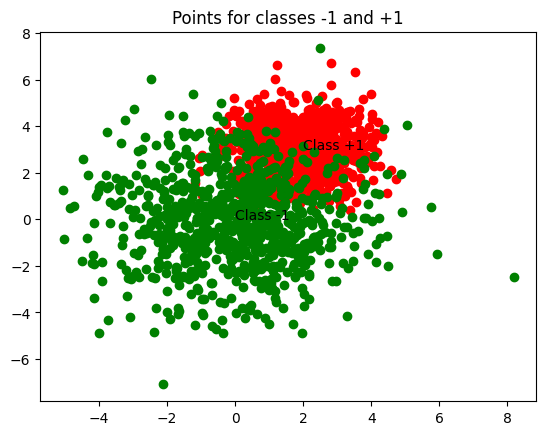

<Figure size 1000x800 with 0 Axes>

In [13]:
random.seed(3)
x_train_positive=[]
x_m = 2
y_m = 3
s = 1 
for i in range(800):
        x1 = x_m + s*np.random.normal(0,1)
        x2 = y_m + s*np.random.normal(0,1)
        x_train_positive.append((x1,x2))

x_train_negative=[]
x_m = 0
y_m = 0
s = 2
for i in range(800):
        x1 = x_m + s*np.random.normal(0,1)
        x2 = y_m + s*np.random.normal(0,1)
        x_train_negative.append((x1,x2))


x_train = x_train_positive + x_train_negative
y_train = len(x_train_positive)*[+1] + len(x_train_negative)*[-1]
x1 = [x_train_positive[i][0] for i in range(len(x_train_positive))]
x2 = [x_train_positive[i][1] for i in range(len(x_train_positive))]
plt.scatter(x1,x2,c="red")
plt.text(2,3,"Class +1")
p1 = [x_train_negative[i][0] for i in range(len(x_train_negative))]
p2 = [x_train_negative[i][1] for i in range(len(x_train_negative))]
plt.scatter(p1,p2,c="green")
plt.text(0,0,"Class -1")
plt.title("Points for classes -1 and +1")
plt.figure(figsize=(10,8))
plt.show